A simple logistic regression implemented with keras. Data is from the preprocessing images file, where classes have been balanced by discarding the excess images of the larger class then randomly shuffled, been split into training and test sets. It was then augmented by a random combination of horizontal and vertical flips, shifting, zooming, and rotations, subsequently increasing the number of images by a factor of 200. Each of these images was then turned into hog features. 

In [1]:
import numpy as np
from scipy import *
import os
import h5py
import keras as k
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from sklearn.utils import shuffle
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [4]:
file = open(r"C:\Users\fires\Desktop\CSIRO\thursday\HOG\train_x.dat",'rb')
train_x = pickle.load(file)
file.close()

file = open(r"C:\Users\fires\Desktop\CSIRO\thursday\HOG\train_y.dat",'rb')
train_y = pickle.load(file)
file.close()

file = open(r"C:\Users\fires\Desktop\CSIRO\thursday\HOG\test_x.dat",'rb')
test_x = pickle.load(file)
file.close()

file = open(r"C:\Users\fires\Desktop\CSIRO\thursday\HOG\test_y.dat",'rb')
test_y = pickle.load(file)
file.close()

In [5]:
# Convert class vectors to binary class matrices
train_y = np_utils.to_categorical(train_y, 2)
test_y = np_utils.to_categorical(test_y, 2)

In [10]:
# Define model attributes
batch_size = 20
nb_classes = output_dims = 2
nb_epoch = 10
input_dim = 3200

model = Sequential()
model.add(Dense(output_dims, input_dim = input_dim, activation='sigmoid'))


In [11]:
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=nb_epoch, batch_size=batch_size, 
          validation_data=(test_x, test_y))

Train on 24600 samples, validate on 24600 samples
Epoch 1/10
24600/24600 [==============================] - 2s 87us/step - loss: 0.4973 - acc: 0.7530 - val_loss: 0.4802 - val_acc: 0.7630
Epoch 2/10
24600/24600 [==============================] - 2s 80us/step - loss: 0.4349 - acc: 0.7947 - val_loss: 0.4620 - val_acc: 0.7769
Epoch 3/10
24600/24600 [==============================] - 2s 85us/step - loss: 0.4255 - acc: 0.7993 - val_loss: 0.4817 - val_acc: 0.7682
Epoch 4/10
24600/24600 [==============================] - 2s 88us/step - loss: 0.4231 - acc: 0.8026 - val_loss: 0.5579 - val_acc: 0.7376
Epoch 5/10
24600/24600 [==============================] - 2s 86us/step - loss: 0.4149 - acc: 0.8062 - val_loss: 0.4730 - val_acc: 0.7746
Epoch 6/10
24600/24600 [==============================] - 2s 86us/step - loss: 0.4098 - acc: 0.8106 - val_loss: 0.4745 - val_acc: 0.7773
Epoch 7/10
24600/24600 [==============================] - 2s 82us/step - loss: 0.4097 - acc: 0.8124 - val_loss: 0.5062 - val_acc

In [3]:
# serialize model to JSON
model_json = model.to_json()
with open("LR_keras.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("LR_keras.h5")
print("Saved model to disk")

NameError: name 'model' is not defined

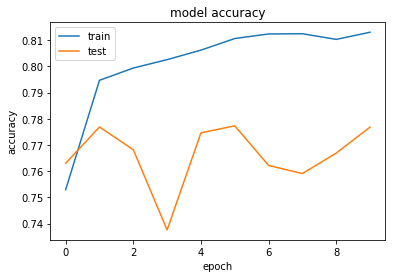

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
for layer in model.layers:
    weights = layer.get_weights()

wt = np.reshape(weights[0], (89, 89, 2))
    
for n in range(0, wt.shape[2]):
   plt.imshow(wt[:,:,n], cmap='gray', shape=(135, 135))
   print (n)
   plt.show()

print ("Dense to output layer weights " + str(weights[1]))

ValueError: cannot reshape array of size 6400 into shape (89,89,2)